# Task 2 : Diffusion Maps

In [15]:
from diffusion_maps import DiffusionMaps
import numpy as np
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from pca import PCA
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part One
### Similarity between Diffusion Maps and Fourier analysis

$$ X = x_k \in \mathbb{R}^2, x_k = (\cos(t_k), \sin(t_k)), t_k = (2 \pi k)/N + 1$$

Let's start by defining $t_k$ and implementing the Fourier analysis

In [16]:
N = 1000
t_k = lambda N,k : (2 * math.pi * k) / (N + 1)

# We define an empty Numpy array to store both the sin and cosine values for t_k for the time step k
values = np.zeros((N, 2))

# Also for each solution t_k, we are going to append it to the T array
T = np.zeros(N)

for i in range(N):
    step = i + 1
    T[i] = t_k(N, step)
    values[i] = (math.cos(T[i]),math.sin(T[i]))

### Now let's compute the diffusion map for 5 eigenfunctions and plot them seperately.

In [17]:
L = 4
diffusion = DiffusionMaps()
eigvals, eigvecs = diffusion.diffusion_algorithm(values, L)

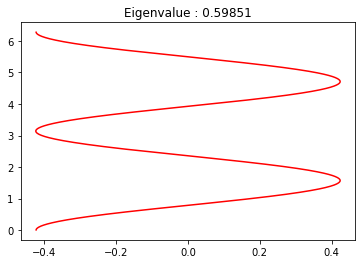

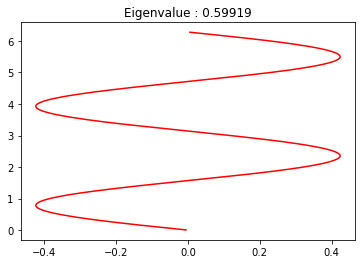

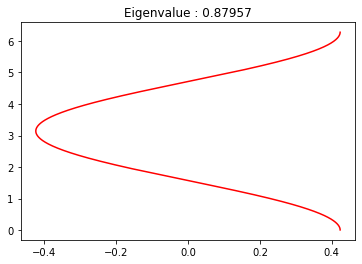

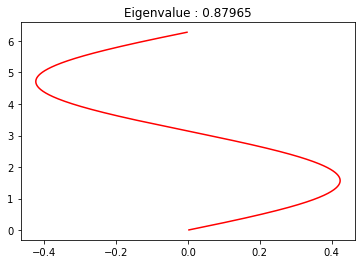

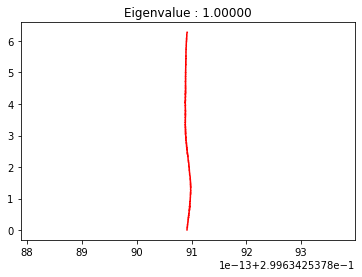

In [18]:
for eigval in range(eigvals.shape[0]):
    plt.title(f"Eigenvalue : {eigvals[eigval]:.5f}")
    plt.plot(eigvecs[:,eigval], T,  color="red")
    plt.show()

### Let's visualize the results for the Fourier

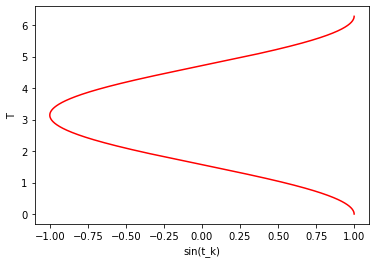

In [19]:
# sin values w.r.t to the T. 
plt.plot(values[:, 0], T, 'k', color='red')
plt.xlabel('sin(t_k)')
plt.ylabel('T');

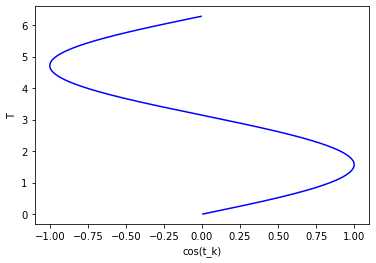

In [20]:
# cos values w.r.t to the T
plt.plot(values[:, 1], T, 'k', color='blue')
plt.xlabel('cos(t_k)')
plt.ylabel('T');

# Part 2 - Swiss Roll Manifold

First ten eigenfunctions of the Laplace-Beltrami operator defined through:

$$ X = {\{x_k \in \mathbb{R}^3}\}_{k=1}^{N}, x_k = (u \cos(u), v, u \sin(u)) $$

First, let's generate the swiss roll dataset and visualize it.

In [21]:
from sklearn.datasets import make_swiss_roll

# By default, make_swiss_roll returns 3-dimensional dataset.
swiss_roll, t = make_swiss_roll(5000)

In [22]:
u = np.random.uniform(0, 10, 5000)
v = np.random.uniform(0, 10, 5000)

X_k = lambda u,v : (u * math.cos(u), v, u * math.sin(u))

# We define an empty Numpy array to store both the sin and cosine values for t_k for the time step k
values = np.zeros((5000, 3))

# Also for each solution t_k, we are going to append it to the T array
T = np.zeros((5000,3))

for i in range(5000):
    step = i + 1
    T[i] = X_k(u[i], v[i])
    values[i] = T[i]

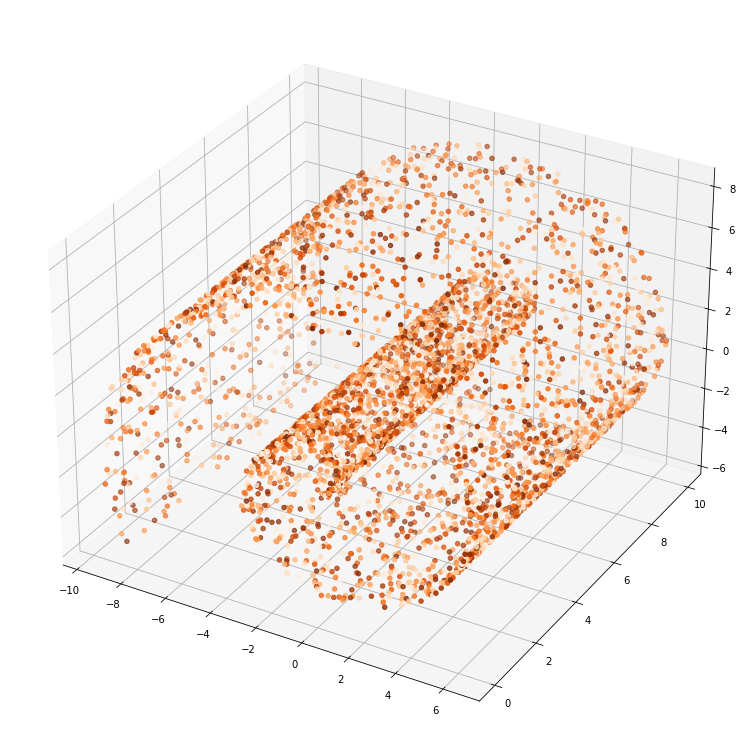

In [23]:
fig = plt.figure(figsize=(15, 30))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(values[:, 0], values[:, 1], values[:, 2], c=t, cmap=plt.cm.Oranges)

We then call the diffusion function to create the 10 eigenfunctions. The first non-constant eigenfunction ( $\phi_l$ != 1) is the penultimate value in the eigenvecs variable, so we select it and plot against the others. In the below plot, eigenvalues are in descending order i.e ( $\phi_0 > \phi_1 > \phi_2$)

In [24]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(values, 10)

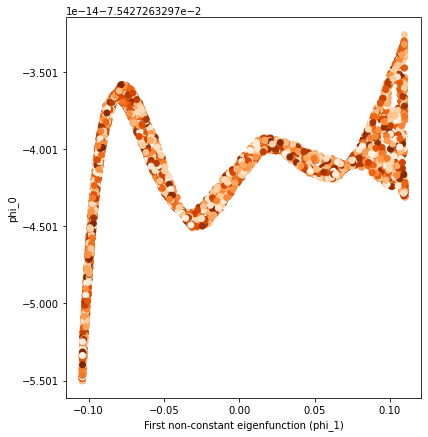

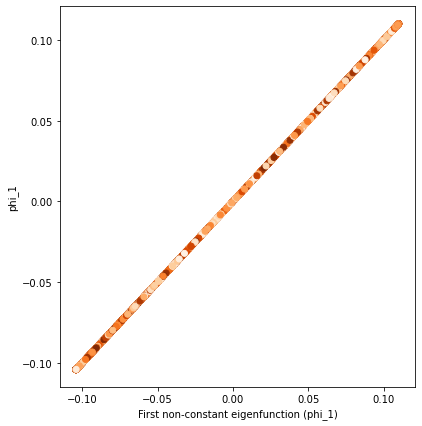

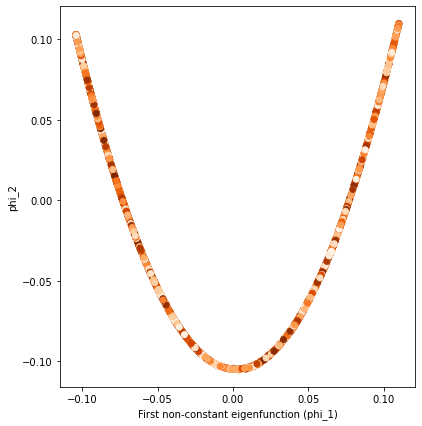

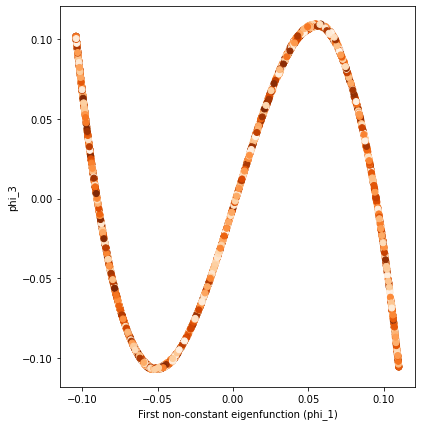

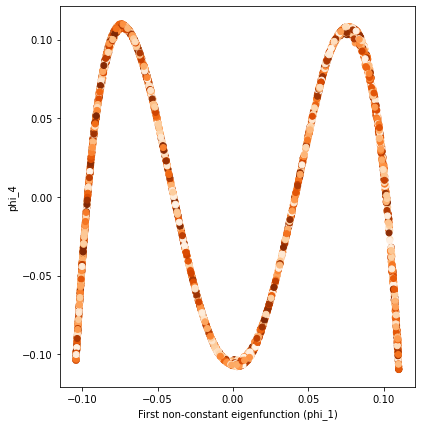

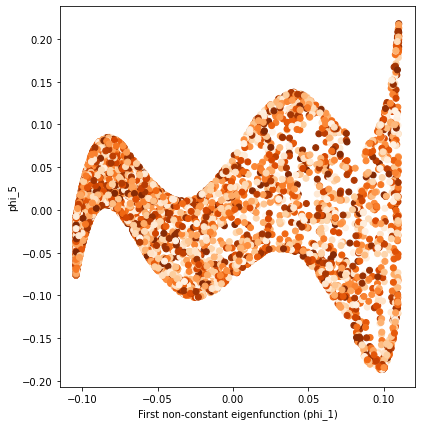

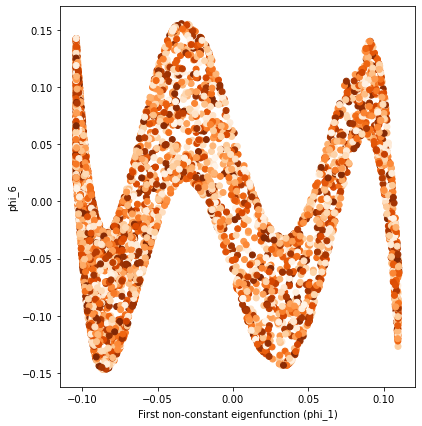

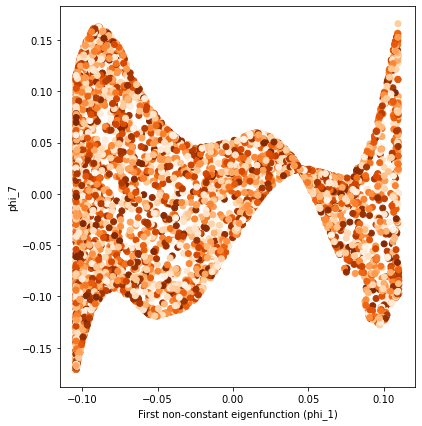

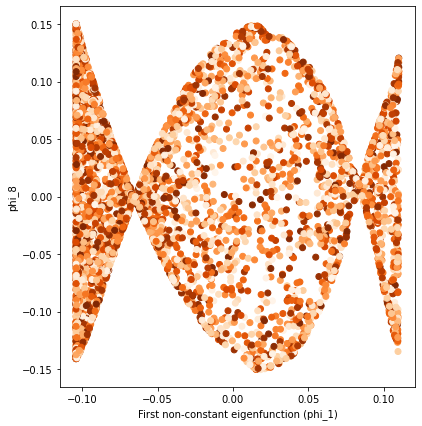

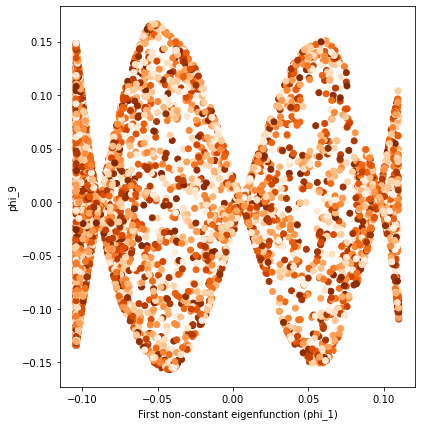

In [25]:
non_const_eigenfunc = eigenvecs[:, -2]

j = 0
for i in range(len(eigenvals) - 1):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - j], c=t, cmap=plt.cm.Oranges)
    ax.set_xlabel(f"First non-constant eigenfunction (phi_1)")
    ax.set_ylabel(f'phi_{i}');
    j += 1

In [26]:
# TODO : At what value of l, phi_l not longer a function of phi_1?

Next, we compute the three principal components of this dataset

In [29]:
pca = PCA()
pca.pca(values)

In [30]:
# Components and energy per components
pca.getComponents()

array([[-0.9964269 , -0.00295085,  0.08440807],
       [ 0.08424582,  0.03634185,  0.99578206],
       [ 0.00600595, -0.99933506,  0.0359634 ]])

In [31]:
pca.getEnergyPerComponent()

array([0.45283692, 0.34201742, 0.20514566])

With two principal components

Total energy:  0.794854337544928


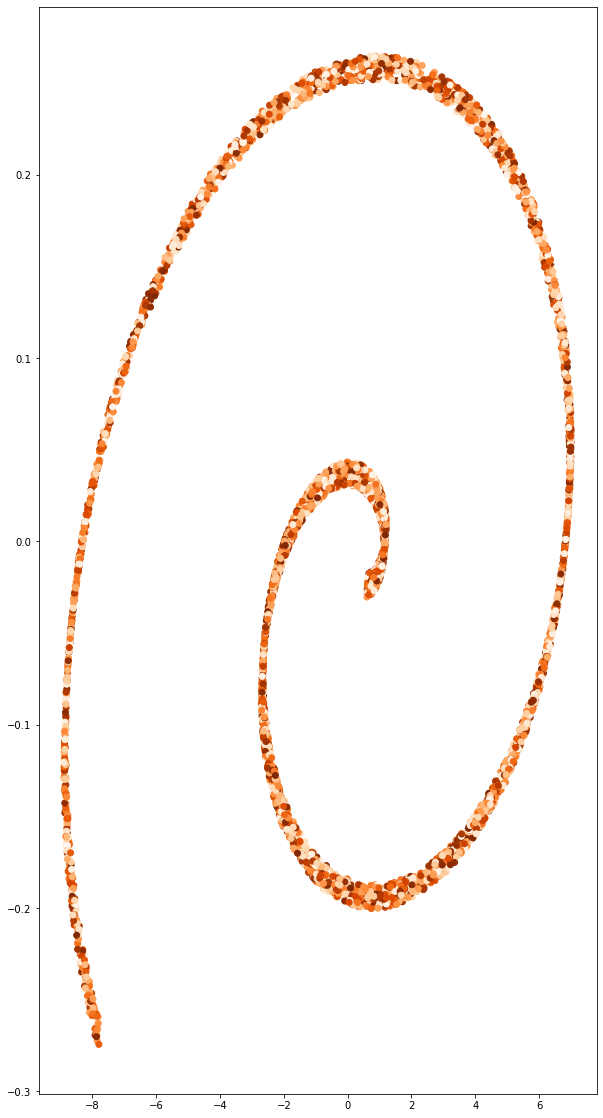

In [32]:
pca = PCA()
pca.pca(values)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t, cmap=plt.cm.Oranges)

By having only 2 principal components, we capture ~72% of the total energy. For 1000 data points in the swiss roll dataset, we try exaclty the same procedure, create the set, compute the 10 eigenfunctions and so on : 

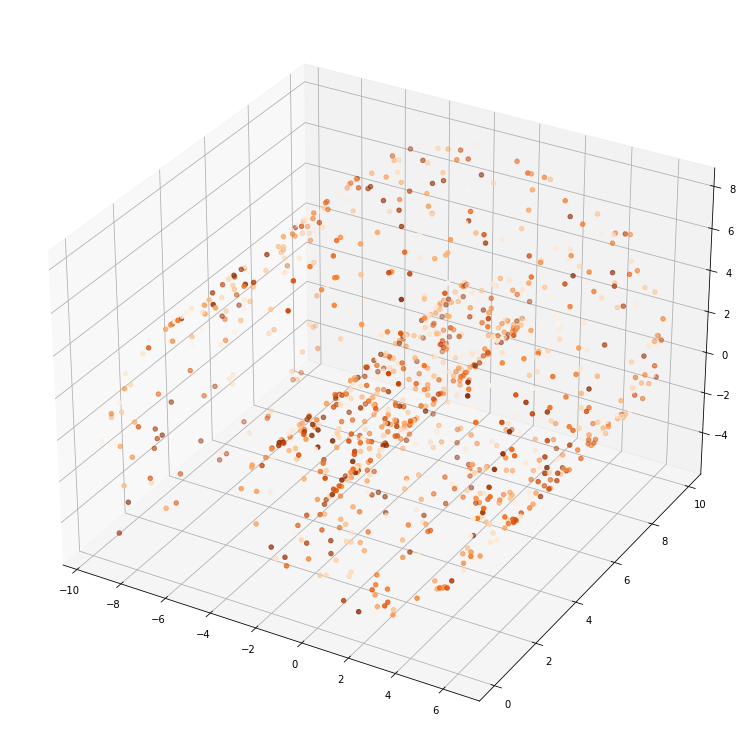

In [33]:
swiss_roll, t_color = make_swiss_roll(1000)

u = np.random.uniform(0, 10, 1000)
v = np.random.uniform(0, 10, 1000)

X_k = lambda u,v : (u * math.cos(u), v, u * math.sin(u))


values = np.zeros((1000, 3))


T = np.zeros((1000,3))

for i in range(1000):
    step = i + 1
    T[i] = X_k(u[i], v[i])
    values[i] = T[i]

fig = plt.figure(figsize=(15, 30))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(values[:, 0], values[:, 1], values[:, 2], c=t_color, cmap=plt.cm.Oranges)

In [34]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(values, 10)

print(eigenvals)

[0.98914757 0.98951751 0.99081344 0.99116909 0.99311301 0.99442669
 0.99542736 0.99733893 0.99876068 0.99967781 1.        ]


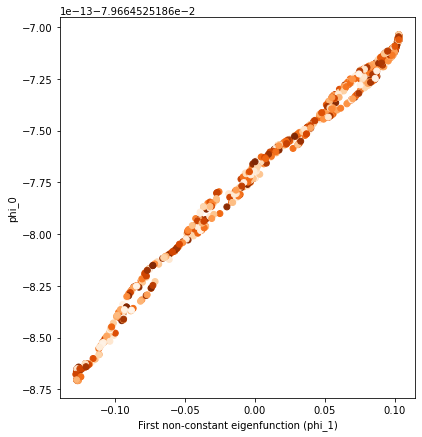

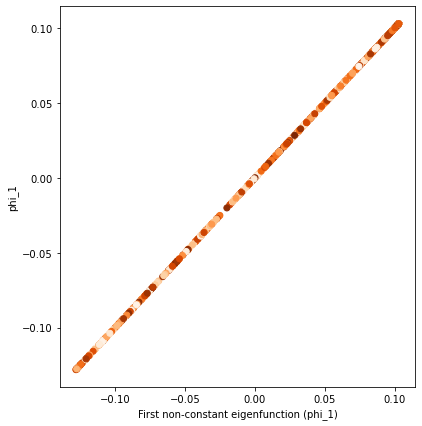

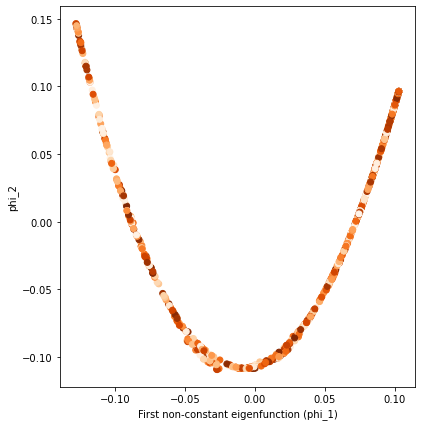

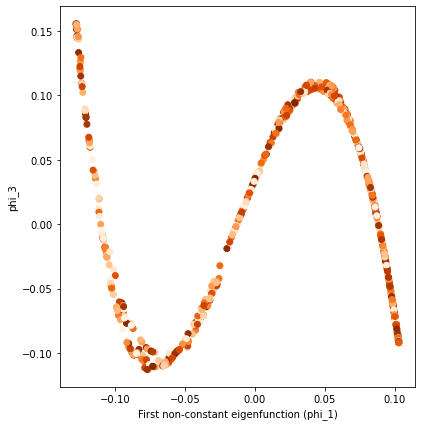

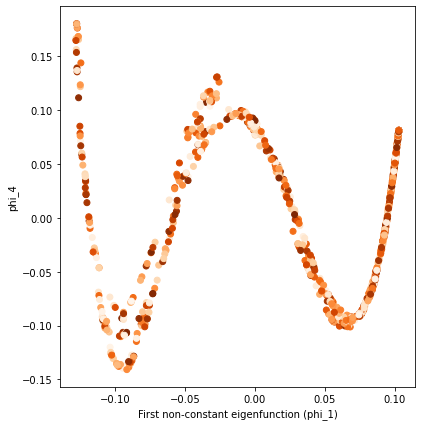

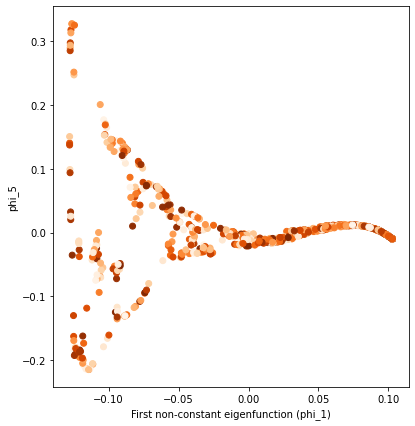

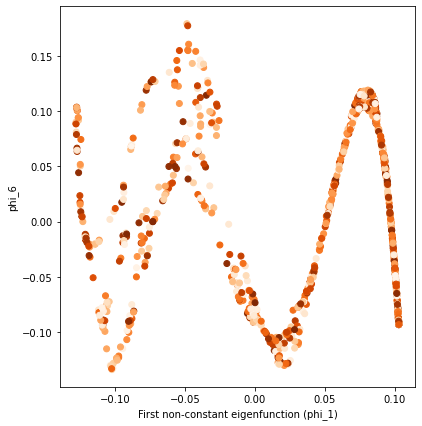

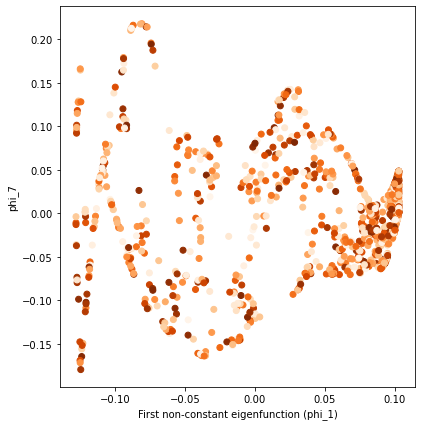

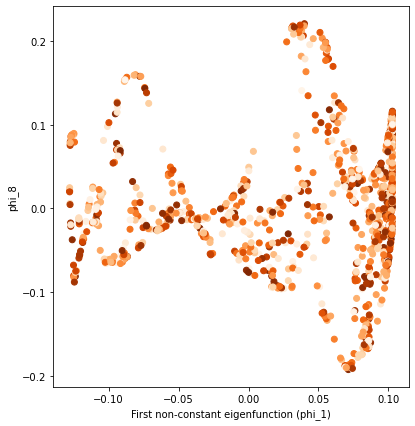

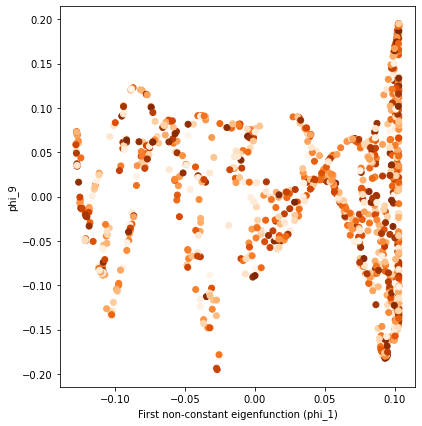

In [35]:
non_const_eigenfunc = eigenvecs[:, -2]

j = 0
for i in range(len(eigenvals) - 1):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - j], c=t_color, cmap=plt.cm.Oranges)
    ax.set_xlabel(f"First non-constant eigenfunction (phi_1)")
    ax.set_ylabel(f'phi_{i}');
    j += 1

Lastly, we apply the PCA both with 3 components and 2 components

In [36]:
pca = PCA()
pca.pca(values)

pca.getComponents()

array([[-0.99982375,  0.00347847, -0.01844894],
       [-0.0181776 ,  0.06635658,  0.99763038],
       [ 0.00469444,  0.99778991, -0.06628165]])

Total energy:  0.7977665951903501


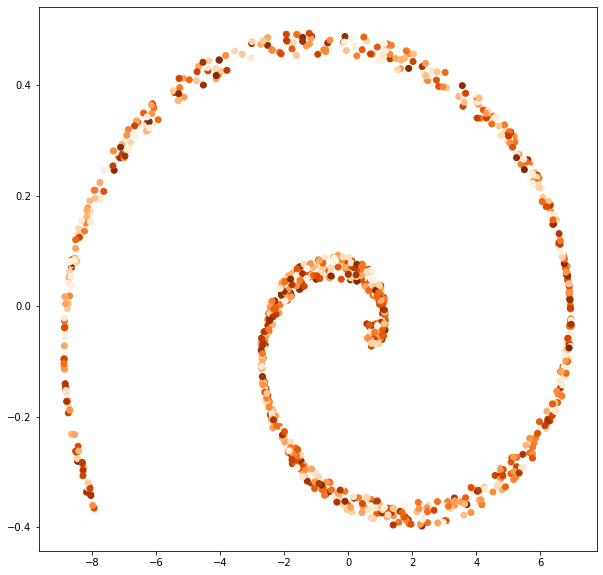

In [37]:
pca = PCA()
pca.pca(values)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t_color, cmap=plt.cm.Oranges)

# Part 3 - Vadere File

Let's start by loading the file

In [272]:
data = Path('') / 'data'
DMAP_vadere_data = np.loadtxt(data / 'data_DMAP_PCA_vadere.txt', dtype = 'double')

In [273]:
DMAP_vadere_data.shape

(1000, 30)

First let's visualize the dataset with Diffusion maps by creating only two eigenfunction. L value is going to pass L+1 to the eigensolver(see ```diffusion_maps.py``` file)

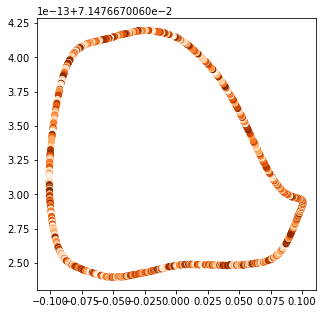

In [274]:
# Two eigenfunctions

L = 1
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.scatter(eigenvector[:,0],eigenvector[:,1], c=t_color, cmap=plt.cm.Oranges)

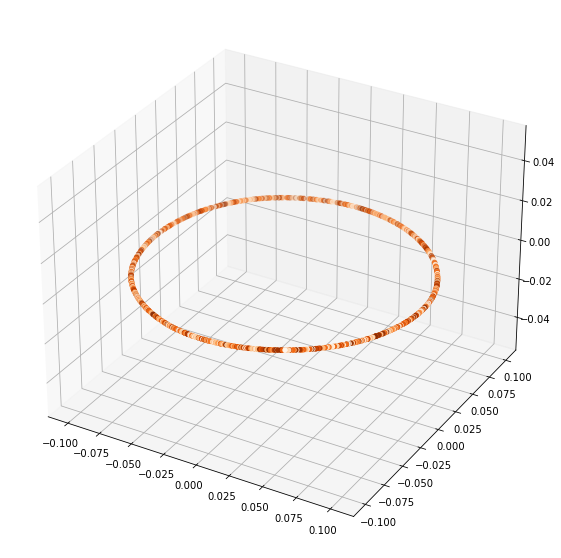

In [275]:
# Three eigenfunctions

L = 2
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], c=t_color, cmap=plt.cm.Oranges)

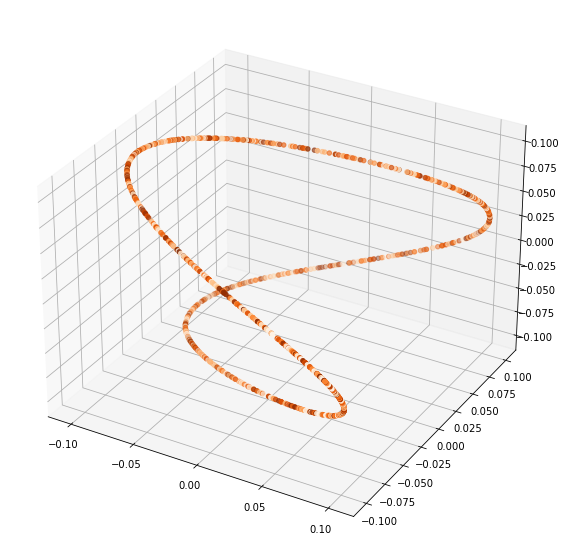

In [276]:
# Four eigenfunctions

L = 3
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2], c=t_color, cmap=plt.cm.Oranges)

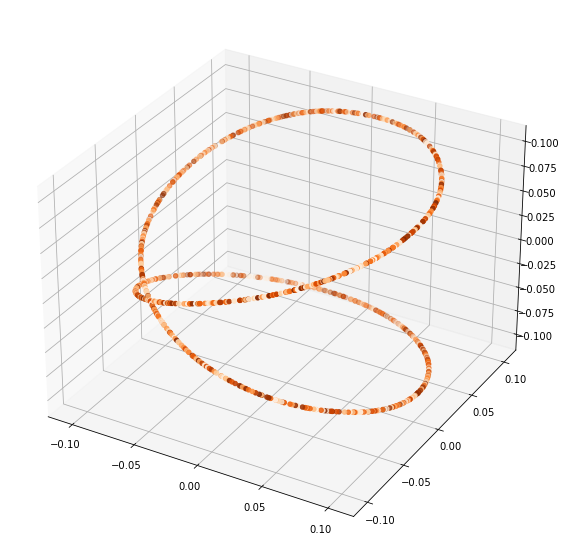

In [277]:
# Five eigenfunctions

L = 4
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2], eigenvector[:, 3], c=t_color, cmap=plt.cm.Oranges)

So, after 4 eigenfunctions, we begin to have intersections between the curves.